hotel: The type of hotel, either "City Hotel" or "Resort Hotel.", resort = vacances

is_canceled: Binary value indicating whether the booking was cancelled (1) or not (0).

lead_time: Number of days between booking and arrival.

arrival_date_year: Year of arrival date.

arrival_date_month: Month of arrival date.

arrival_date_week_number: Week number of arrival date.

arrival_date_day_of_month: Day of the month of arrival date.

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stays.

stays_in_week_nights: Number of weekday nights (Monday to Friday) the guest stays.

adults: Number of adults.

children: Number of children.

babies: Number of babies.

meal: Type of meal booked.

country: Country of origin.

market_segment: Market segment designation.

distribution_channel: Booking distribution channel.

is_repeated_guest: Binary value indicating whether the guest is a repeated guest (1) or not (0).

previous_cancellations: Number of previous booking cancellations.

previous_bookings_not_canceled: Number of previous bookings not cancelled.

reserved_room_type: Code of room type reserved.

assigned_room_type: Code of room type assigned at check-in.

booking_changes: Number of changes/amendments made to the booking.

deposit_type: Type of deposit made.

agent: ID of the travel agency.

company: ID of the company.

days_in_waiting_list: Number of days in the waiting list before booking.

customer_type: Type of booking.

adr: Average daily rate. combien gagne l'hotel, pour la journée donnée, par chambre

required_car_parking_spaces: Number of car parking spaces required.

total_of_special_requests: Number of special requests made.

reservation_status: Reservation last status.

reservation_status_date: Date of the last status.

name: Guest's name. (Not Real)

email: Guest's email address.(Not Real)

phone-number: Guest's phone number. (Not Real)

credit_card: Guest's credit card details. (Not Real)

In [12]:
import pandas as pd
import numpy as np 
import matplotlib as plt
from fct import *
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("../hotel_bookings.csv", sep=",")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Cleaning

### NaN and select columns

In [14]:
colonne_a_garder = ["hotel", "is_canceled", "lead_time", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "meal", "country", "market_segment", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "reserved_room_type", "assigned_room_type", "booking_changes", "deposit_type", "days_in_waiting_list", "customer_type", "adr", "required_car_parking_spaces", "total_of_special_requests"]
df = df[colonne_a_garder]
df.dropna(inplace=True)
df.drop_duplicates(subset=colonne_a_garder, inplace=True)
print(df.isnull().sum())




hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


## type of columns (date, ...)

In [15]:
df['arrival_date_month'] = pd.to_datetime(df.arrival_date_month, format='%B', errors='coerce').dt.month
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))
# df.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'], axis=1, inplace=True)
df['arrival_date_year'] = df['arrival_date_year'] - 2015
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342                  0   
1       Resort Hotel            0        737                  0   
2       Resort Hotel            0          7                  0   
3       Resort Hotel            0         13                  0   
4       Resort Hotel            0         14                  0   
...              ...          ...        ...                ...   
119385    City Hotel            0         23                  2   
119386    City Hotel            0        102                  2   
119387    City Hotel            0         34                  2   
119388    City Hotel            0        109                  2   
119389    City Hotel            0        205                  2   

        arrival_date_month  arrival_date_day_of_month  \
0                        7                          1   
1                        7                          1   
2                       

## nettoyage données valeurs aberrantes (var quanti), modalité seule (var quali)

In [16]:
columns_to_filter_quanti = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces"]
columns_to_filter_quali = ["reserved_room_type", "assigned_room_type"]

# Filter variables quanti
for column in columns_to_filter_quanti:
    df = filter_occurence_variable(df, column, 10)

# Filter variables quali
for column in columns_to_filter_quali:
    df = filter_occurence_variable(df, column, 10)

df = df[df['meal'] != "Undefined"]

## binary to categorielle

In [17]:
# columns_binary = ["is_canceled", "is_repeated_guest"]

# for column in columns_binary:
#     df[column] = df[column].astype('category')

# print(df["is_canceled"].info())

## Encodage One-hot pour algo machine learning

In [18]:
col_quali = ["hotel", "meal", "country", "market_segment", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]
df_encoded = pd.get_dummies(df, columns=col_quali, dtype=int)
df_encoded.drop(["arrival_date"], axis=1, inplace=True)
for col in df_encoded.columns:
    if df_encoded[col].dtype != "float64":
        df_encoded[col] = df_encoded[col].astype('int64')

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68439 entries, 0 to 119389
Columns: 227 entries, is_canceled to customer_type_Transient-Party
dtypes: float64(2), int64(225)
memory usage: 119.0 MB


## Standardiser ou normaliser les variables quantitatives

In [19]:
# df = standardisation(df)
# df_encoded = standardisation(df_encoded)
df['lead_time'] = np.log(df['lead_time'] + 1)
df['arrival_date_day_of_month'] = np.log(df['arrival_date_day_of_month'] + 1)
df['adr'] = np.log(df['adr'] + 1)

df_encoded['lead_time'] = np.log(df_encoded['lead_time'] + 1)
df_encoded['arrival_date_day_of_month'] = np.log(df_encoded['arrival_date_day_of_month'] + 1)
df_encoded['adr'] = np.log(df_encoded['adr'] + 1)

# Analyses

## Régression logistique

Accuracy of logistic regression classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      9892
           1       0.69      0.51      0.59      3796

    accuracy                           0.80     13688
   macro avg       0.76      0.71      0.73     13688
weighted avg       0.79      0.80      0.79     13688



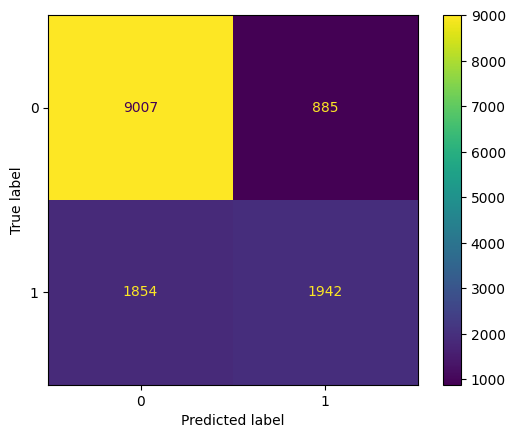

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
confusion_matrix = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_).plot()
print(classification_report(y_test, y_pred))

## Carte choroplèthe

In [21]:
import plotly.express as px

# Créer un DataFrame avec le nombre d'annulations par pays
df_cancelled = df[df['is_canceled'] == 1].groupby('country').size().reset_index(name='num_cancellations')

# Créer la carte choroplèthe
fig = px.choropleth(df_cancelled, locations='country',
                    color='num_cancellations',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Nombre d\'annulations par pays',
                    labels={'num_cancellations':'Nombre d\'annulations'})

fig.update_layout(width=800, height=600)

fig.show()


## ANN

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


X = df_encoded.drop('is_canceled', axis=1)
y = to_categorical(df_encoded['is_canceled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 10)


Epoch 1/10
1711/1711 [==============================] - 4s 2ms/step - loss: 0.4176 - accuracy: 0.7978 - val_loss: 0.3857 - val_accuracy: 0.8149
Epoch 2/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3779 - accuracy: 0.8193 - val_loss: 0.3972 - val_accuracy: 0.8139
Epoch 3/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3654 - accuracy: 0.8266 - val_loss: 0.3698 - val_accuracy: 0.8252
Epoch 4/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8293 - val_loss: 0.3690 - val_accuracy: 0.8193
Epoch 5/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3520 - accuracy: 0.8335 - val_loss: 0.3712 - val_accuracy: 0.8231
Epoch 6/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3485 - accuracy: 0.8345 - val_loss: 0.3633 - val_accuracy: 0.8243
Epoch 7/10
1711/1711 [==============================] - 3s 2ms/step - loss: 0.3434 - accuracy: 0.8370 - val_loss: 0.3692 - val_accuracy:

In [23]:
# plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',
        template = 'plotly_dark')

ValueError: All arguments should have the same length. The length of column argument `df[wide_variable_0]` is 10, whereas the length of  previously-processed arguments ['x'] is 100

In [ ]:
plt.figure(figsize = (12, 6))

train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy'] 
epoch = range(1, 101)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')